In [1]:
%matplotlib inline
import pandas as pd
import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
stockFile = 'data/T10yr.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])
stock.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.498,6.603,6.498,6.548,0,6.548
2000-01-04,6.530,6.548,6.485,6.485,0,6.485
2000-01-05,6.521,6.599,6.508,6.599,0,6.599
2000-01-06,6.558,6.585,6.540,6.549,0,6.549
2000-01-07,6.545,6.595,6.504,6.504,0,6.504
2000-01-10,6.540,6.567,6.536,6.558,0,6.558
2000-01-11,6.600,6.664,6.595,6.664,0,6.664
2000-01-12,6.659,6.696,6.645,6.696,0,6.696
2000-01-13,6.664,6.705,6.618,6.618,0,6.618


In [77]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2015']

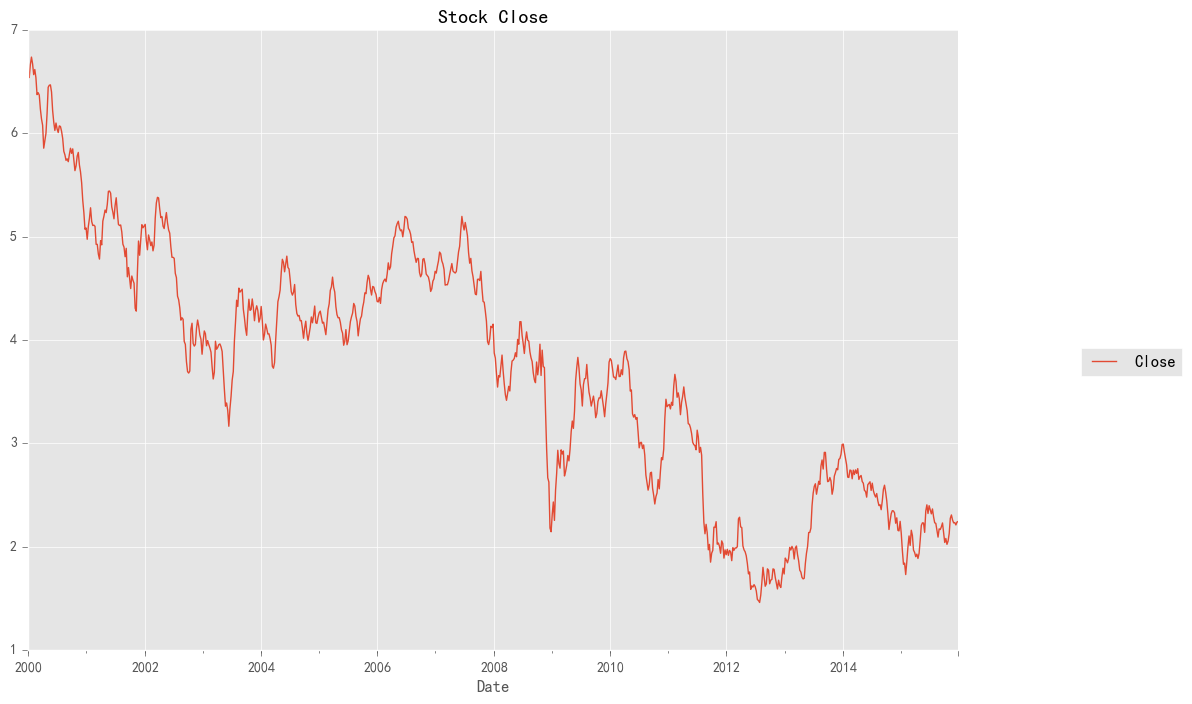

In [78]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()

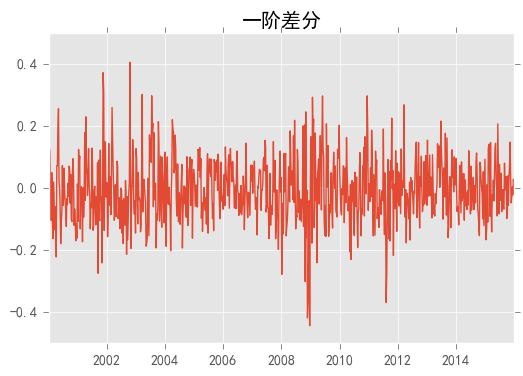

In [79]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


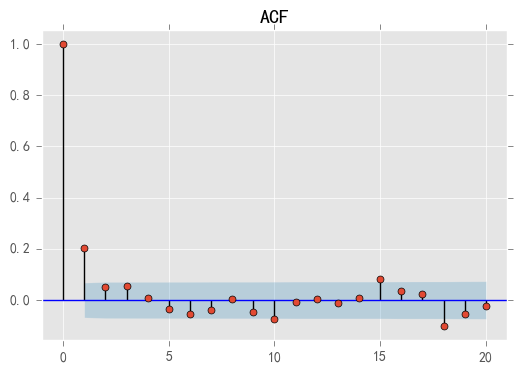

In [80]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


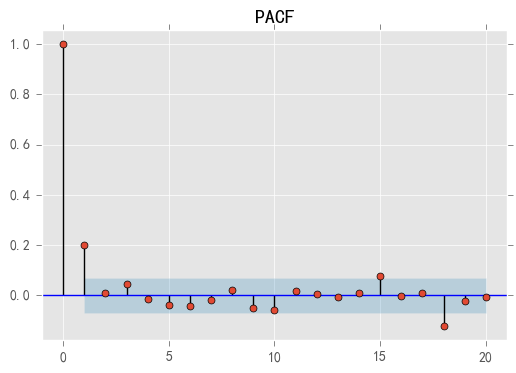

In [81]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [82]:
model = ARIMA(stock_train, order=(1, 1, 1),freq='W-MON')

In [83]:
result = model.fit()
#print(result.summary())

In [90]:
pred = result.predict('20140609', '20160701',dynamic=True, typ='levels')
print (pred)

2014-06-09    2.463559
2014-06-16    2.455539
2014-06-23    2.449569
2014-06-30    2.444183
2014-07-07    2.438962
2014-07-14    2.433788
2014-07-21    2.428627
2014-07-28    2.423470
2014-08-04    2.418315
2014-08-11    2.413159
2014-08-18    2.408004
2014-08-25    2.402849
2014-09-01    2.397693
2014-09-08    2.392538
2014-09-15    2.387383
2014-09-22    2.382227
2014-09-29    2.377072
2014-10-06    2.371917
2014-10-13    2.366761
2014-10-20    2.361606
2014-10-27    2.356451
2014-11-03    2.351296
2014-11-10    2.346140
2014-11-17    2.340985
2014-11-24    2.335830
2014-12-01    2.330674
2014-12-08    2.325519
2014-12-15    2.320364
2014-12-22    2.315208
2014-12-29    2.310053
                ...   
2015-12-07    2.057443
2015-12-14    2.052288
2015-12-21    2.047132
2015-12-28    2.041977
2016-01-04    2.036822
2016-01-11    2.031666
2016-01-18    2.026511
2016-01-25    2.021356
2016-02-01    2.016200
2016-02-08    2.011045
2016-02-15    2.005890
2016-02-22    2.000735
2016-02-29 

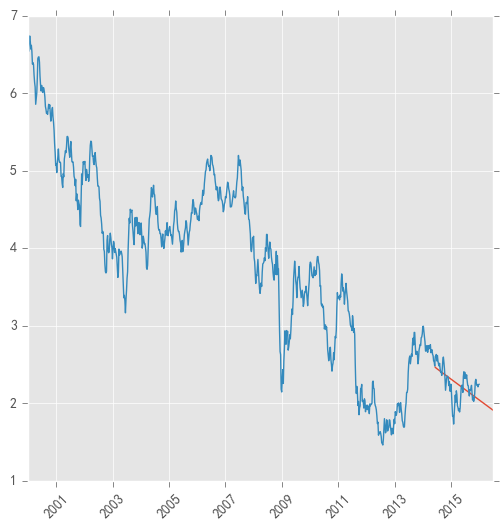

In [91]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)